<a href="https://colab.research.google.com/github/lecristinaa/DatasetAutoMPG/blob/main/Dataset_Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- O que é o dataset?
O Auto MPG Dataset é um conjunto de dados que contém informações sobre veículos e seu consumo de combustível. Além disso, é um exemplo de dados de regressão.

- Qual seu contexto?

- Qual seu objetivo?
Prever o consumo de combustível de automóveis com base em suas características físicas e técnicas. O target (variável dependente) é a média de milhas por galão (MPG – Miles Per Gallon), que indica o quanto o veículo percorre por galão de combustível.

- Colunas dos dataset:
O dataset é composto por 398 linhas (carros) e 9 colunas (variáveis), sendo 8 de entrada (features) e 1 variável de saída (target).

>-> cylinders: número de cilindros do motor do carro. (Quantitativa Discreta)

>-> displacement: deslocamento do motor, o volume total de todos os cilindros do motor. Valor dado em polegadas cúbicas. (Quantitativa Contínua)

>-> horsepower: potência do motor do carro medida em cavalos (Quantitativa Contínua)

>-> weight: peso do carro em libras (Quantitativa Contínua)

>-> acceleration: aceleração do carro, medida em segundos para atingir 60 milhas por hora (Quantitativa Contínua)

>-> model_year: ano do modelo do carro, indicando o ano de fabricação (Quantitativa Discreta)

>-> origin: país de origem do carro, com os valores sendo:
1 = EUA;
2 = Europa;
3 = Japão;
(Qualitativa)

>-> car_name: nome do carro (Qualitativa)

>-> mpg ou target: média de milhas por galão que o carro percorre, variável de previsão (Quantitativa Contínua)

In [1]:
pip install ucimlrepo

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Realiza a importação indicada no site do DataSet: https://archive.ics.uci.edu/dataset/9/auto+mpg
from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9)


df = pd.DataFrame(auto_mpg.data.features, columns=auto_mpg.data.feature_names)
df['mpg'] = auto_mpg.data.targets


In [77]:
# Realiza a importação de acordo com o site do Seaborn: https://www.geeksforgeeks.org/seaborn-datasets-for-data-science/
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [123]:
# Pega somente as colunas quantitativas contínuas para realizar os cálculos
colunas_quantitativas = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg']
df_quantitativas = df[colunas_quantitativas]
df_quantitativas.describe()
# Retorna a média (mean), o valor mínimo (min), o valor máximo (max) e os valores dos quartis

,cylinders,displacement,horsepower,weight,acceleration,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,46.600000


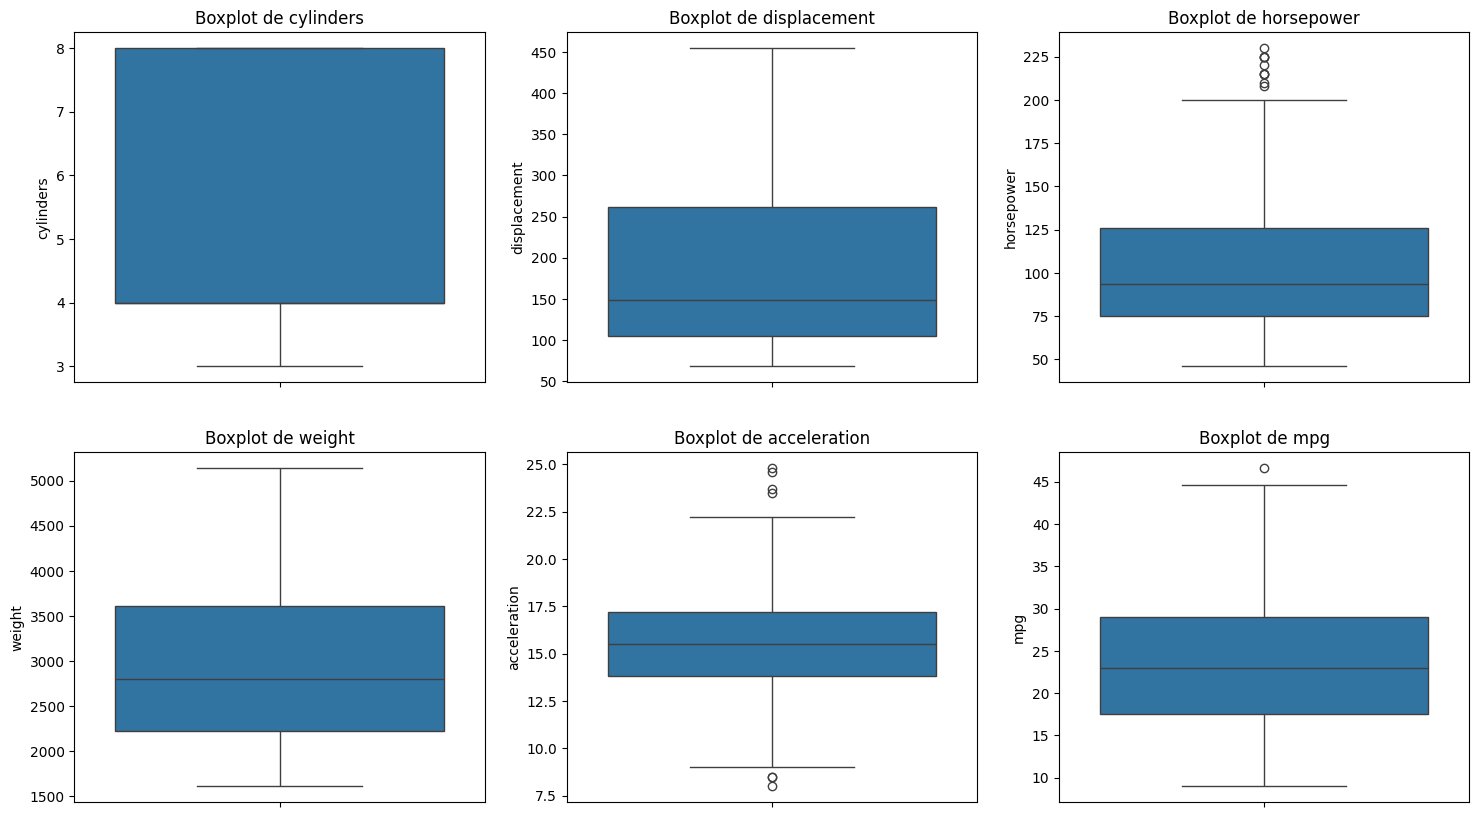

In [120]:
# Criando um quartil (boxplot) para cada coluna quantitativa

plt.figure(figsize=(18, 10))  # Ajusta o tamanho da figura

# Definie o número de linhas e colunas para o gráficos
n_colunas = 3  # 3 colunas por linha
n_linhas = 2   # 2 linhas

# Seleciona as colunas e cria um gráfico para cada uma
for i, coluna in enumerate(colunas_quantitativas):
    plt.subplot(n_linhas, n_colunas, i+1)  # Define a posição do gráfico na grid
    sns.boxplot(data=df_quantitativas[coluna])  # Cria o boxplot
    plt.title(f'Boxplot de {coluna}')  # Adiciona título


<Axes: >

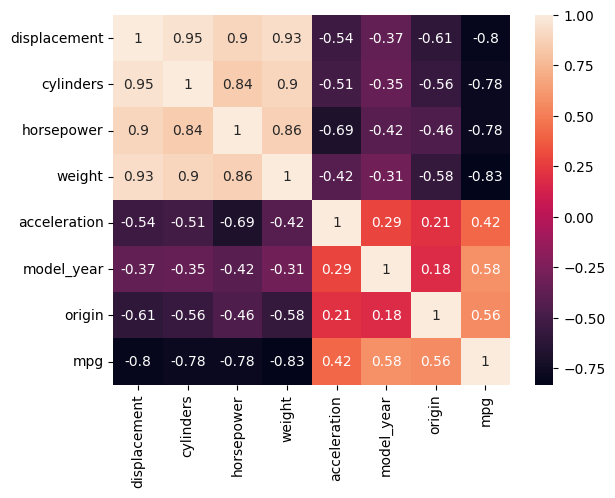

In [124]:
# Correlação de Pearson
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='cylinders', ylabel='displacement'>

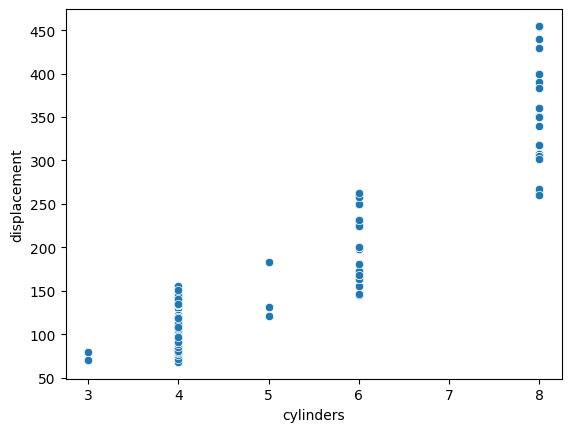

In [156]:
sns.scatterplot(x=df['cylinders'], y=df['displacement'])

# Quanto mais cilindros, maior a quantidade de deslocamento

<Axes: xlabel='weight_group', ylabel='mpg'>

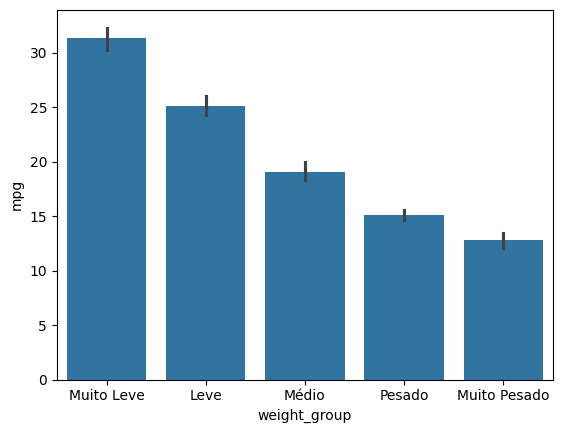

In [134]:
# Agrupar 'weight' em categorias (bins) para melhor visualização do gráfico
df['weight_group'] = pd.cut(df['weight'], bins=5, labels=['Muito Leve', 'Leve', 'Médio', 'Pesado', 'Muito Pesado'])

sns.barplot(x=df['weight_group'], y=df['mpg'])

# Indica que quanto mais pesado o carro (exigem mais energia para se mover) menor será sua eficiência de combustível (o quanto ele consegue percorrer)

<Axes: xlabel='origin', ylabel='acceleration'>

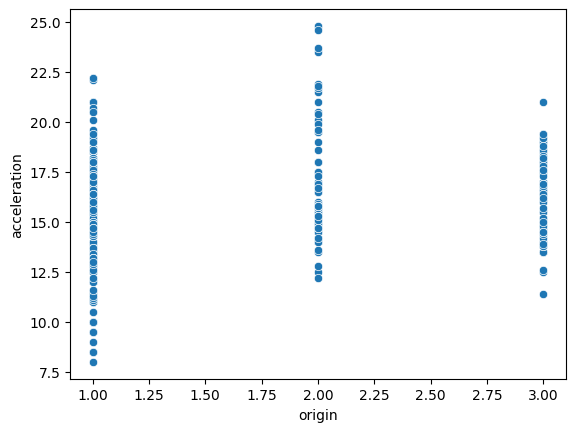

In [157]:
sns.scatterplot(x=df['origin'], y=df['acceleration'])

# Mesmo tendo um número de correlação perto do 0, é possível perceber que os carros dos EUA tendem a ser mais lentos (mas não influenciados somente por esse fator)

<Axes: xlabel='acceleration', ylabel='weight'>

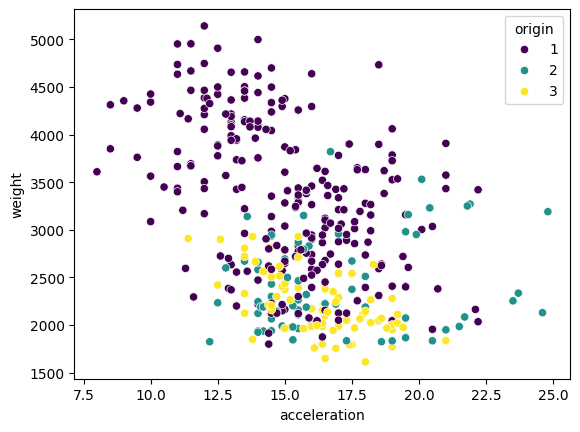

In [150]:
sns.scatterplot(x=df['acceleration'], y=df['weight'], hue=df['origin'], palette='viridis')

# Muito provavelmente, o motivo pelo qual os carros dos EUA sejam mais lentos é por conta do seu peso, e não do páis de origem

<Axes: xlabel='acceleration', ylabel='horsepower'>

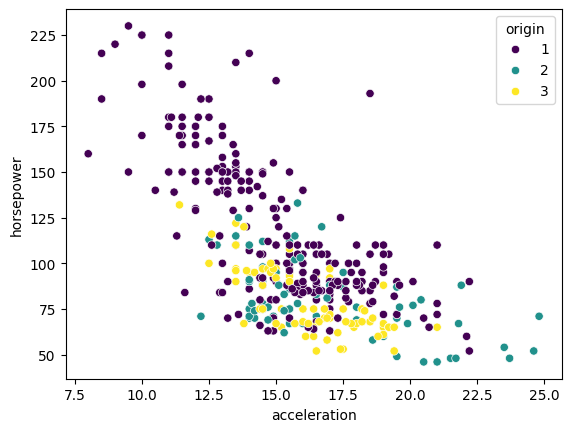

In [149]:
sns.scatterplot(x=df['acceleration'], y=df['horsepower'], hue=df['origin'], palette='viridis')

# Ou até mesmo sejam influenciáveis pela quantidade de cavalos

<Axes: xlabel='weight', ylabel='horsepower'>

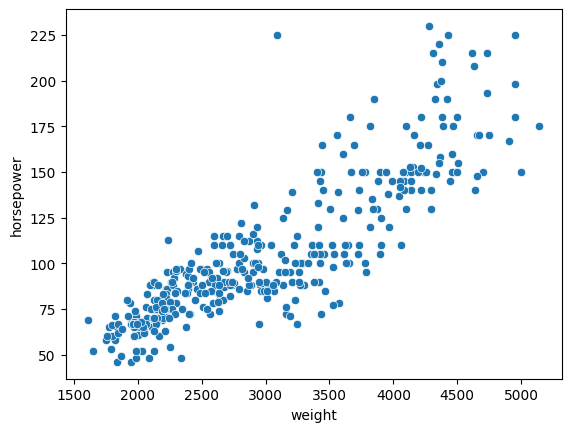

In [155]:
sns.scatterplot(x=df['weight'], y=df['horsepower'])

# Uma vez que a correlação dos cavalos e do peso é próxima a 1, ou seja, quanto mais pesado, mais cavalos

In [ ]:
# Ou seja, quanto mais cavalos tiverem o carro, mais pesado ele será, então mais lento ele também será
# (O país de origem se torna apenas um fator secundário e não extremamente necessário para a análise)